**Classification with SVM || Dataset: ring**

Support Vector Machines (SVM) are a type of supervised machine learning algorithm used for classification and regression tasks. The primary objective of SVM is to find a hyperplane in an N-dimensional space (where N is the number of features) that distinctly classifies data points into different classes. SVM is particularly effective in high-dimensional spaces and is widely used in various fields, including image classification, text categorization, and bioinformatics.

SVMs have proven to be effective in various applications, and their versatility, especially with the use of different kernel functions, makes them a popular choice in machine learning. However, SVMs might not perform as well on very large datasets, and their training can be computationally expensive. Additionally, the choice of the appropriate kernel and tuning parameters is crucial for achieving good performance.

**Import modules:**
*  The os module in Python provides a way of interacting with the operating system.
*  The pandas library is a powerful and widely used library in Python for data manipulation and analysis. It provides data structures like Series and DataFrame for working with structured data efficiently.
*   The matplotlib.pyplot module is a part of the matplotlib library, which is widely used for creating static, animated, and interactive visualizations in Python.
*   scikit-learn (or sklearn for short) is a popular machine learning library in Python. It provides simple and efficient tools for data analysis and modeling, including various machine learning algorithms, preprocessing techniques, and evaluation metrics.





In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import KFold

**Loading data**


*   Load training/test data.  
Using the numpy.loadtxt function to load data from a file with a tab-separated format ('\t' delimiter) and specifying the data types for the columns.

  * *'names': ('x', 'y', 'C') specifies the names of the fields/columns in the resulting NumPy array.*

  * *'formats': ('f4', 'f4', 'i4') specifies the data types for each field. In this case, 'f4' represents a 32-bit floating-point number, and 'i4' represents a 32-bit integer.*

* Create training/test DataFrame

A DataFrame is a two-dimensional data structure in the Python library called Pandas. Pandas is a powerful and widely used tool for data manipulation and analysis in the Python programming environment. The DataFrame data structure is fundamental to Pandas and can be thought of as a table in an SQL database or an Excel spreadsheet.

In [ ]:
# Load training data
filename1 = 'A2-ring-separable.txt'
#filename1 = 'A2-ring-merged.txt'
ring_separable_data = np.loadtxt(filename1, delimiter='\t', dtype={'names': ('x', 'y', 'C'), 'formats': ('f4', 'f4', 'i4')})

# Create training DataFrame
train_df = pd.DataFrame(ring_separable_data)
print(train_df)

# Load test data
filename2 = 'A2-ring-test.txt'
ring_test_data = np.loadtxt(filename2, delimiter='\t', dtype={'names': ('x', 'y', 'C'), 'formats': ('f4', 'f4', 'i4')})

# Create test DataFrame
test_df = pd.DataFrame(ring_test_data)
print(test_df)

             x         y  C
0    -0.137094  0.899654  0
1     0.542574 -0.492435  1
2    -0.658204  0.605110  0
3    -0.869820  0.519287  0
4     0.678610  0.346579  1
...        ...       ... ..
9995  0.419610 -0.482939  1
9996 -0.456348  0.910800  0
9997 -0.003036 -0.295153  1
9998  0.765332  0.798063  0
9999 -0.532259 -0.302748  1

[10000 rows x 3 columns]
             x         y  C
0     0.512196  0.112623  1
1     0.610173 -0.387091  1
2     0.927970  0.245895  0
3     0.159933  0.111516  0
4    -0.451556  0.877259  0
...        ...       ... ..
9995  0.958078 -0.422827  0
9996  0.544659 -0.590963  0
9997 -0.684583  0.916596  0
9998  0.906773  0.274620  0
9999 -0.544859  0.132948  1

[10000 rows x 3 columns]


**Exploring Data**

Using Matplotlib to create a scatter plot with a legend based on the third column of a DataFrame (train_df).

* fig, ax = plt.subplots(): Creates a figure and a set of subplots. ax is the subplot, and fig is the whole figure.

* ax.set_aspect('equal', 'box'): Sets the aspect ratio of the plot to be equal.

* scatter = ax.scatter(train_df.iloc[:, 0], train_df.iloc[:, 1], c=train_df.iloc[:, 2], s=1): Creates a scatter plot using the first two columns of train_df as x and y coordinates, the third column as the color (c), and s=1 sets the marker size to 1.

* legend1 = ax.legend(*scatter.legend_elements(), loc="lower left", title="Classes"): Creates a legend based on the unique colors in the scatter plot. The legend is placed in the lower-left corner with the title "Classes".

* ax.add_artist(legend1): Adds the legend to the plot.

* plt.show(): Displays the plot.

This code seems to be visualizing a 2D scatter plot where points are colored based on the values in the third column of the DataFrame (train_df). The legend represents the classes based on the unique colors used in the scatter plot.

**Training**

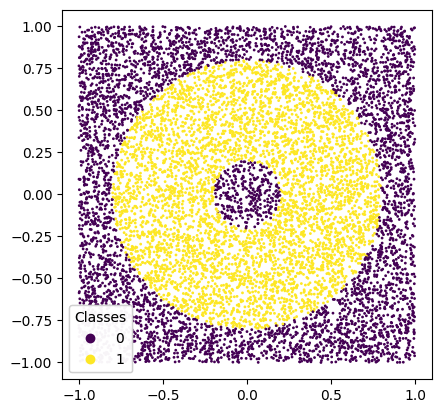

In [ ]:
fig, ax = plt.subplots()
ax.set_aspect('equal', 'box')
scatter = ax.scatter(train_df.iloc[:,0], train_df.iloc[:,1], c=train_df.iloc[:,2], s=1)
# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left",
                    title="Classes")
ax.add_artist(legend1)
plt.show()

**Test**

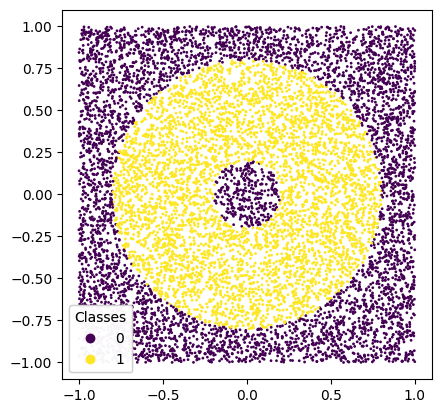

In [ ]:
fig, ax2 = plt.subplots()
ax2.set_aspect('equal', 'box')
scatter2 = ax2.scatter(test_df.iloc[:,0], test_df.iloc[:,1], c=test_df.iloc[:,2], s=1)
# produce a legend with the unique colors from the scatter
legend2 = ax2.legend(*scatter2.legend_elements(),
                    loc="lower left",
                    title="Classes")
ax2.add_artist(legend2)
plt.show()

**Cross validation** using k-fold cross-validation

K-fold cross-validation is a popular technique in machine learning for assessing the performance of a predictive model. It helps in mitigating the variability in a single train-test split and provides a more robust estimate of the model's performance.

This code performs 4-fold cross-validation using a radial kernel support vector machine (SVM) for classification. The evaluation metric used is the classification error rate.

Here is the breakdown of the code:

* Data Preparation:
        X_train and y_train are created from the 'x' and 'y' columns of train_df and the 'C' column, respectively. These NumPy arrays are used as training sets in cross-validation.

* Cross-Validation Setup:
        KFold is used with 4 folds (n_splits=4) to split the data into training and validation sets in each cross-validation iteration.

* Cross-Validation Iterations:
        A loop is performed through the folds of cross-validation.
        In each iteration, a Support Vector Machine (SVM) classifier with Radial Basis Function (RBF) kernel (SVC(kernel='rbf', random_state=0)) is created.
        The model is trained on the current training set (X_train[train], y_train[train]).
        Predictions are generated on the current validation set (X_train[validation]).
        The model is evaluated using accuracy, and the confusion matrix is displayed.

* Calculation of Classification Error:
        The classification error is calculated in each iteration from the confusion matrix.
        The classification error is printed for each iteration.

* Cross-Validation Results:
        The obtained classification errors in each iteration are stored in the list cv_percentage_classification_errors.
        The mean classification error obtained from cross-validation is printed.

In summary, this code uses cross-validation to assess the performance of an SVM classifier on a dataset. The main metric is the classification error, and the code provides detailed information on accuracy and the confusion matrix in each cross-validation fold.





K-fold ---------------------------------------------------------------
Model accuracy: 0.9724


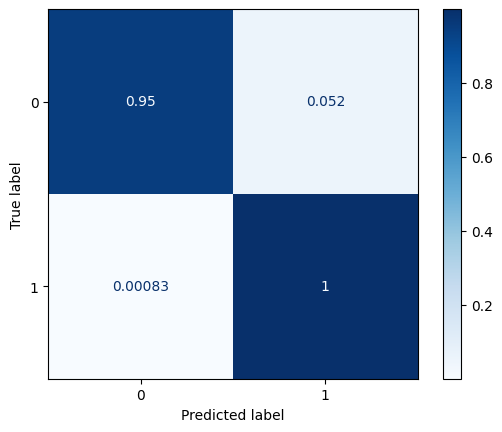

Confusion matrix:
 [[1232   68]
 [   1 1199]]
Percentage classification error obtained from validation set: 2.76%
K-fold ---------------------------------------------------------------
Model accuracy: 0.974


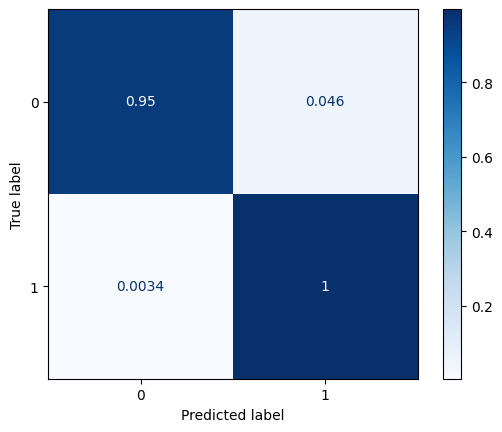

Confusion matrix:
 [[1254   61]
 [   4 1181]]
Percentage classification error obtained from validation set: 2.6%
K-fold ---------------------------------------------------------------
Model accuracy: 0.9688


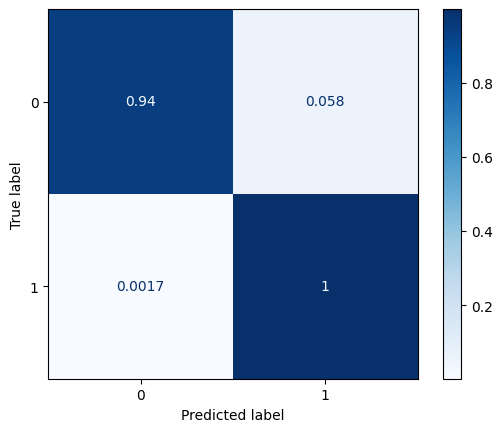

Confusion matrix:
 [[1241   76]
 [   2 1181]]
Percentage classification error obtained from validation set: 3.1199999999999997%
K-fold ---------------------------------------------------------------
Model accuracy: 0.9708


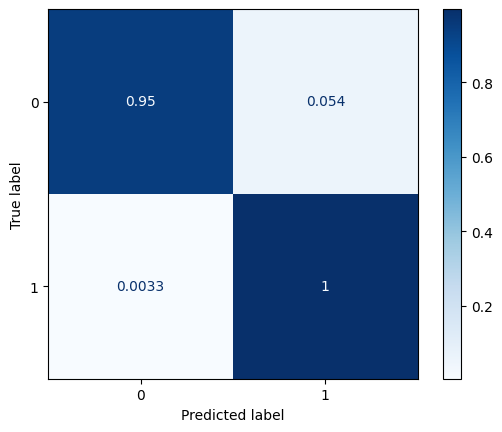

Confusion matrix:
 [[1202   69]
 [   4 1225]]
Percentage classification error obtained from validation set: 2.92%
Mean percentage classification error obtained from cross validation: 2.8499999999999996%


In [ ]:
X_train = train_df[['x', 'y']].to_numpy()
y_train = train_df['C'].to_numpy()

cv_percentage_classification_errors = list()

# 4-fold cross-validation
kf = KFold(n_splits=4)
for train, validation in kf.split(X_train):
    print('K-fold ---------------------------------------------------------------')
    #print("%s %s" % (train, validation))
    #print('Training set')
    #print(X_train[train])
    #print(y_train[train])
    #print('Validation set')
    #print(X_train[validation])
    #print(y_train[validation])

    # Create the SVM estimator
    clf = SVC(kernel='rbf', random_state=0)

    # Train the model using the training set
    clf.fit(X_train[train], y_train[train])

    # Generate predictions
    y_pred = clf.predict(X_train[validation])

    # Evaluate by means of accuracy
    accuracy = accuracy_score(y_train[validation], y_pred)
    print(f'Model accuracy: {accuracy}')

    # Evaluate by means of a confusion matrix
    disp = ConfusionMatrixDisplay.from_predictions(y_train[validation], y_pred,
                                                   labels=clf.classes_,
                                                   display_labels=clf.classes_,
                                                   cmap=plt.cm.Blues,
                                                   normalize='true')
    plt.show()

    cm = confusion_matrix(y_train[validation], y_pred)
    print('Confusion matrix:\n', cm)

    # Calculate the percentage classification error obtained from validation test
    percentage_classification_error = 100 * ((cm[0][1] + cm[1][0]) / (cm[0][0] + cm[1][1] + cm[0][1] + cm[1][0]))
    print(f'Percentage classification error obtained from validation set: {percentage_classification_error}%')

    cv_percentage_classification_errors.append(percentage_classification_error)

# Calculate the mean percentage classification error obtained from cross-validation
print(f'Mean percentage classification error obtained from cross validation: {np.mean(cv_percentage_classification_errors)}%')

**Training**

This code focuses on the creation and training of a Support Vector Machine (SVM) classifier with a radial kernel (RBF). Below is an analysis of the code:
* Creation of the SVM Estimator:
        The SVC class from scikit-learn is used to create a Support Vector Machine (SVM) classifier.
        kernel='rbf' specifies that a radial basis function (RBF) kernel will be used for the SVM.
        random_state=0 sets a seed for reproducibility of results.

* Printing Current Parameter Values:
        clf.get_params() prints the names and current values of all parameters of the newly created SVM estimator.

* Model Training:
        clf.fit(X_train, y_train) trains the SVM model using the entire training set (X_train is the feature matrix, and y_train is the label vector).

In summary, this code creates an SVM classifier with a radial kernel, prints the names and values of the SVM estimator's parameters, and then trains the model using the entire training set. The model is being used for classification, as the radial kernel is commonly used in classification problems with SVM.



In [ ]:
# Create the SVM estimator
clf = SVC(kernel='rbf', random_state=0)
print('Names and current values for all parameters for the estimator: ', clf.get_params())

# Train the model using 'all' the training set
clf.fit(X_train, y_train)

Names and current values for all parameters for the estimator:  {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': 0, 'shrinking': True, 'tol': 0.001, 'verbose': False}


SVC(random_state=0)

**Test**

This code performs the evaluation of the trained SVM model on a test set (test_df). Here is the analysis of the code:

* Test Data Preparation:
        X_test and y_test are created from the 'x' and 'y' columns of test_df and the 'C' column, respectively. These NumPy arrays are used as the test set.

* Prediction Generation:
        The features of the test set (X_test) are used to generate predictions using the previously trained SVM model (clf.predict(X_test)).

* Visualization of Predictions:
        A scatter plot visualization of the predictions on the test set is created.

* Model Evaluation:
        The accuracy of the model is evaluated using accuracy_score by comparing the predictions (y_pred) with the actual labels of the test set (y_test).
        The confusion matrix is displayed and visualized using ConfusionMatrixDisplay.

* Calculation of Classification Error:
        The classification error on the test set is calculated from the confusion matrix.
        The classification error is printed.

This code is a crucial part of the model evaluation process. It visualizes predictions, calculates accuracy, displays the confusion matrix, and reports the percentage classification error on the test set.


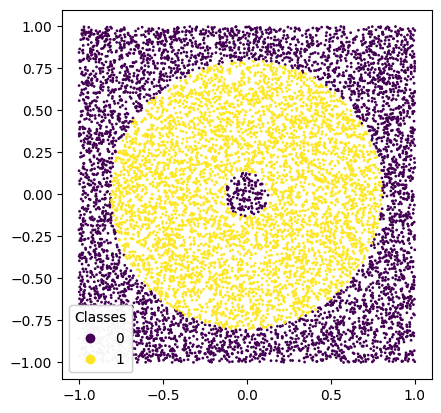

Model accuracy: 0.9764


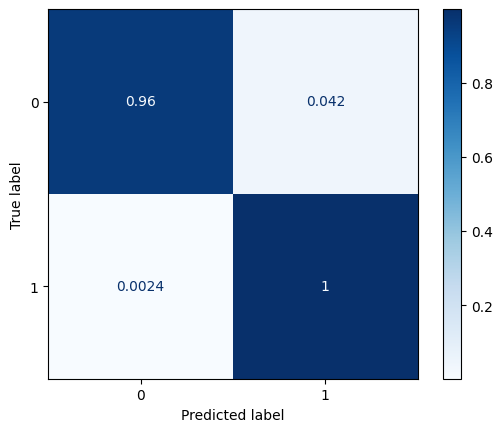

Confusion matrix:
 [[5108  225]
 [  11 4656]]
Percentage classification error obtained from test set: 2.36%


In [ ]:
X_test = test_df[['x', 'y']].to_numpy()
y_test = test_df['C'].to_numpy()

#print(X_test)
#print(y_test)

# Generate predictions
y_pred = clf.predict(X_test)

# Visualize predictions
fig, ax = plt.subplots()
ax.set_aspect('equal', 'box')
scatter = ax.scatter(X_test[:,[0]], X_test[:,[1]], c=y_pred, s=1)
# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left",
                    title="Classes")
ax.add_artist(legend1)
plt.show()

# Evaluate by means of accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Model accuracy: {accuracy}')

# Evaluate by means of a confusion matrix
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred,
                                               labels=clf.classes_,
                                               display_labels=clf.classes_,
                                               cmap=plt.cm.Blues,
                                               normalize='true')
plt.show()

cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n', cm)

# Calculate the percentage classification error obtained from test set
percentage_classification_error = 100 * ((cm[0][1] + cm[1][0]) / (cm[0][0] + cm[1][1] + cm[0][1] + cm[1][0]))
print(f'Percentage classification error obtained from test set: {percentage_classification_error}%')

This code creates a Pandas DataFrame named df from the results of evaluating a Support Vector Machine (SVM) model on a test set. Subsequently, it exports this DataFrame to a CSV file named 'ring_svm_results.csv'. Here is the breakdown of the code:

* Creation of a Results Dictionary:
        A dictionary named ring_svm_results is created, containing two keys: 'real_value' and 'prediction'.
        'real_value' stores the actual labels from the test set (y_test).
        'prediction' stores the model predictions on the test set (y_pred).

* DataFrame Creation:
        The ring_svm_results dictionary is used to create a Pandas DataFrame named df.
        The DataFrame will have two columns: 'real_value' and 'prediction'.

* Export to CSV:
        The DataFrame df is exported to a CSV file named 'ring_svm_results.csv' using the Pandas to_csv() method.

In summary, this code takes the actual labels and predictions from the test set of an SVM model, organizes them into a DataFrame, and then saves that DataFrame to a CSV file. This kind of export is often done for further analysis or for sharing results with others.


In [ ]:
ring_svm_results = {'real_value': y_test,
                    'prediction': y_pred}

df = pd.DataFrame(ring_svm_results)

df.to_csv('ring_svm_results.csv')

**Interpretation of the data**

The value "Model accuracy: 0.9764" indicates that the model correctly classified 97.64% of instances in the test set. This 97.64% accuracy suggests a solid performance of the model in the specific classification task for which it was trained.

In general, a high accuracy is a positive indicator, suggesting that the model is effective in classifying instances. However, it's always important to consider the context of the problem and examine other metrics, especially if there are asymmetric costs associated with specific classification errors.

In summary, a high accuracy value indicates that the model is doing well in classification, but it is always advisable to evaluate other metrics and consider the specific context of the problem.

Confusion Matrix:

    True Positives (TP): 5108
    False Positives (FP): 225
    False Negatives (FN): 11
    True Negatives (TN): 4656

Interpretation:

    The model correctly predicted 5108 instances of the positive class.
    There were 225 instances that the model predicted as positive but were actually negative.
    Only 11 instances were incorrectly classified as negative when they were positive.
    The model correctly predicted 4656 instances of the negative class.

Percentage Classification Error:

    The percentage classification error obtained from the test set is 2.36%. This indicates the proportion of instances in which the model made incorrect predictions relative to the total number of instances.

In summary, the confusion matrix provides a detailed breakdown of the model's predictions, and the low percentage classification error (2.36%) suggests that the model has a strong performance on the test set. The model particularly excels in correctly predicting instances of the positive and negative classes.
